<a href="https://colab.research.google.com/github/yash-clear/Anomaly_Detection/blob/main/2019uch0031%2B2019ucs0092_ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

# ASSIGNMENT -1

The goal of this assignment is
to take new cases as target variable and predict them from mobility data.


## TASK PERFORMED BY : YASHASWITA SINGH (2019UCH0031)
##                     ANKUSH GARG (2019UCS0092)

Language: Python

In [ ]:
#Importing essential libraries 

import pandas as pd
import plotly.express as px
import seaborn as sns
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


IMPORTING DATASET

In [ ]:
df1 = pd.read_csv('/content/changes-visitors-covid (1).csv')
df2 = pd.read_csv('/content/owid-covid-data (1).csv')

Take “India” as the
case study for this assignment.

In [ ]:
india_df1 = df1[df1['Entity'] == "India"]
india_df2 = df2[df2['iso_code']=='IND']

In [ ]:
india_df1.reset_index(inplace = True)
india_df2.reset_index(inplace = True)

In [ ]:
india_df1

,index,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
1,23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
2,23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
3,23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
4,23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143
...,...,...,...,...,...,...,...,...,...,...
466,24363,India,IND,2021-05-28,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
467,24364,India,IND,2021-05-29,-61.286,-24.429,23.714,-48.714,-40.000,-44.571
468,24365,India,IND,2021-05-30,-61.143,-24.714,23.714,-49.000,-39.143,-44.286
469,24366,India,IND,2021-05-31,-60.143,-23.429,23.286,-48.286,-38.000,-43.429


In [ ]:
india_df1.drop(['index'], axis=1, inplace = True)
india_df2.drop(['index'], axis=1, inplace = True)

india_df2.drop(india_df2.columns[6:], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


RESET THE INDEXES

In [ ]:
india_df2

,iso_code,continent,location,date,total_cases,new_cases
0,IND,Asia,India,2020-01-30,1.0,1.0
1,IND,Asia,India,2020-01-31,1.0,0.0
2,IND,Asia,India,2020-02-01,1.0,0.0
3,IND,Asia,India,2020-02-02,2.0,1.0
4,IND,Asia,India,2020-02-03,3.0,1.0
...,...,...,...,...,...,...
486,IND,Asia,India,2021-05-30,28047534.0,152734.0
487,IND,Asia,India,2021-05-31,28175044.0,127510.0
488,IND,Asia,India,2021-06-01,28307832.0,132788.0
489,IND,Asia,India,2021-06-02,28441986.0,134154.0


In [ ]:

india_df2 = india_df2[18: -2]
india_df2.reset_index(inplace = True)

In [ ]:
india_df2

,index,iso_code,continent,location,date,total_cases,new_cases
0,18,IND,Asia,India,2020-02-17,3.0,0.0
1,19,IND,Asia,India,2020-02-18,3.0,0.0
2,20,IND,Asia,India,2020-02-19,3.0,0.0
3,21,IND,Asia,India,2020-02-20,3.0,0.0
4,22,IND,Asia,India,2020-02-21,3.0,0.0
...,...,...,...,...,...,...,...
466,484,IND,Asia,India,2021-05-28,27729247.0,173790.0
467,485,IND,Asia,India,2021-05-29,27894800.0,165553.0
468,486,IND,Asia,India,2021-05-30,28047534.0,152734.0
469,487,IND,Asia,India,2021-05-31,28175044.0,127510.0


### Creating a new data frame 

In [ ]:
final_df = pd.concat([india_df1, india_df2['new_cases']], axis=1, join='inner')

In [ ]:
final_df = final_df.iloc[:, 3:]

In [ ]:
final_df

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0
...,...,...,...,...,...,...,...
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
467,-61.286,-24.429,23.714,-48.714,-40.000,-44.571,165553.0
468,-61.143,-24.714,23.714,-49.000,-39.143,-44.286,152734.0
469,-60.143,-23.429,23.286,-48.286,-38.000,-43.429,127510.0


In [ ]:

y = final_df['new_cases']
y


X = final_df.iloc[:,:-1]
X

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,0.667,1.667,0.000,2.000,3.000,3.000
1,0.500,1.750,0.000,2.000,3.250,3.000
2,0.400,1.800,0.200,1.800,2.800,3.200
3,0.500,2.000,0.000,2.333,3.167,3.333
4,-0.143,1.714,0.714,1.429,3.571,0.143
...,...,...,...,...,...,...
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
467,-61.286,-24.429,23.714,-48.714,-40.000,-44.571
468,-61.143,-24.714,23.714,-49.000,-39.143,-44.286
469,-60.143,-23.429,23.286,-48.286,-38.000,-43.429


In [ ]:
from random import seed
def train_test_split(X,y,test_size=0.2):

    seed(5)
    ind = np.random.permutation(X.index)
    X=X.reindex(ind)
    y=y.reindex(ind)

    l=X.shape[0]
    train_X,train_y,test_X,test_Y=[],[],[],[]

    criterion=int((1-test_size)*l)
    train_X=X.iloc[:criterion]
    train_y=y.iloc[:criterion]
    test_X=X.iloc[criterion:]
    test_y=y.iloc[criterion:]
    
    return train_X,test_X,train_y,test_y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2 SCORE 

In [ ]:
def r2_Score(Y_true, Y_pred):
    Y_true = Y_true.values.tolist()
    Y_pred = Y_pred.values.tolist()
    Y_mean=np.mean(Y_true)

    RSS=0
    TSS=0

    for i in range(len(Y_true)):
        RSS=RSS+np.square(Y_true[i]-Y_pred[i])
        TSS=TSS+np.square(Y_true[i]-Y_mean)
        
    return(1-(RSS/TSS))

### ID3A

In [ ]:

class DecisionTreeRegressor:
  
  def fit(self, X, y, min_leaf = 5):
    self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
    return self
  
  def predict(self, X):
    return self.dtree.predict(X.values)

In [ ]:
class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

In [ ]:

regressor = DecisionTreeRegressor().fit(X, y)
preds = regressor.predict(X)
# preds

In [ ]:
# X_test
# y_test

In [ ]:
pred_test = regressor.predict(X_test)

In [ ]:
# pred_test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


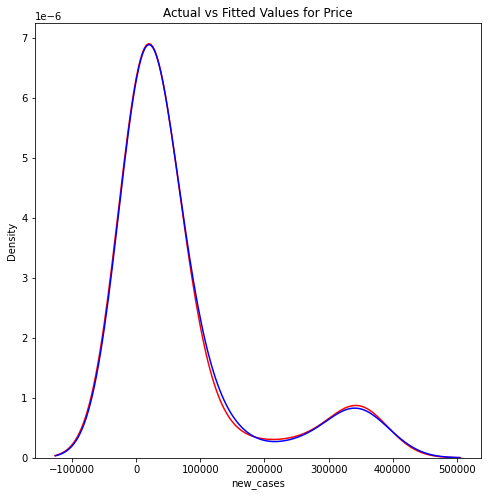

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rms = mean_squared_error(y_test, pred_test, squared=False)
rms

15215.940898382962

In [ ]:
r2 = r2_score(y_test, pred_test)
r2

0.9787580583042875

COUNT vs TARGET VARIABLE 

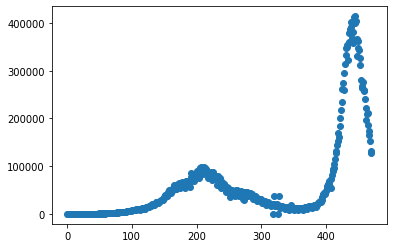

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df.index,final_df['new_cases'])
plt.show()

### CART

In [ ]:
class Node2:

  def __init__(self,predicted_val,num_samples):
          self.num_samples = num_samples
          self.predicted_val = predicted_val
          self.feature_index = 0
          self.threshold = 0
          self.left = None
          self.right = None

  # def is_leaf(self):
  #         return ~(self.left or self.right)
def standard_deviation(target):
        avg=np.average(target)
        sd=0;
        n=len(target)
        for i in target:
          sd=sd+np.square((i-avg))
        sd=np.sqrt(sd/n)
        return sd



class CART2:
    

    def __init__(self,max_depth = None):
        self.max_depth = max_depth
        

    def fit(self, x, y):

        self.n_features_=x.shape[1]
        self.tree=self.grow_tree(x,y)

    def grow_tree(self,X,y,depth=0):

        predicted_val=np.mean(y)
        node = Node2(num_samples=y.size,
                    predicted_val=predicted_val)

        if depth < self.max_depth:
           
            idx, thr = self._best_split(X, y)
            
            if idx is not None:
                indices_left = X.iloc[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = int(idx)
                node.threshold = float(thr)
                node.left = self.grow_tree(X_left, y_left, depth + 1)
                node.right = self.grow_tree(X_right, y_right, depth + 1)

        return node

    def predict(self, X,pred=[]):
        
        for inputs in X:
                self._predict(inputs,pred=pred) 
        return pred

   

    def _predict(self, inputs,pred):

        node = self.tree
      
        while node.left:
            
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        pred.append(node.predicted_val)
        

    def _best_split(self, X, y):
        
        m = y.size
        
        if m <= 1:
            return None, None

        sd_parent =standard_deviation(y)
        
        best_sd = sd_parent
        best_idx, best_thr = None, None

        for idx in range(self.n_features_):
            thresholds, Val = zip(*sorted(zip(X.iloc[:, idx], y)))



            sd_left=[0]
            sd_right=Val
            sd_right=sd_right[1:]

            

            for i in range(1,m):

                split=(thresholds[i]+thresholds[i-1])/2

                sd_l= standard_deviation(sd_left)
                sd_r=standard_deviation(sd_right)
              
                sd_left.append(sd_right[0])
                sd_right=sd_right[1:]

                child_sd=(i*sd_l +(m-i)*sd_r)/m
              
                if thresholds[i] == thresholds[i - 1]:
                    continue

                if child_sd < best_sd:
                   
                    best_sd=child_sd
                    best_idx=idx
                    best_thr=split
       
        return best_idx, best_thr 

In [ ]:

model=CART2(50)


test =[]
  
for index, rows in X_test.iterrows():
    my_list =[rows.retail_and_recreation, rows.grocery_and_pharmacy, rows.residential, rows.transit_stations, rows.parks, rows.workplaces]
      
    test.append(my_list)

model.fit(X_train,y_train)

Predictions=model.predict(test)

In [ ]:
# Predictions

ACCURACY AND PERFORMANCE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


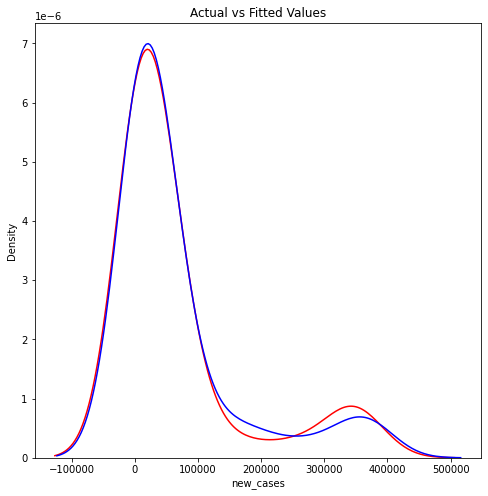

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
RMSE = np.sqrt(np.sum(((y_test-Predictions)**2)/len(y_test)))
RMSE

25603.981582423992

FEATURE CORRELATION WITH TARGET VARIABLE

In [ ]:
final_df.corr()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
retail_and_recreation,1.000000,0.820786,-0.925891,0.970580,0.906370,0.928552,-0.134351
grocery_and_pharmacy,0.820786,1.000000,-0.840430,0.913562,0.664009,0.867805,-0.052792
residential,-0.925891,-0.840430,1.000000,-0.928817,-0.768427,-0.969960,0.313037
transit_stations,0.970580,0.913562,-0.928817,1.000000,0.880851,0.951951,-0.153770
parks,0.906370,0.664009,-0.768427,0.880851,1.000000,0.794867,-0.119766
workplaces,0.928552,0.867805,-0.969960,0.951951,0.794867,1.000000,-0.232405
new_cases,-0.134351,-0.052792,0.313037,-0.153770,-0.119766,-0.232405,1.000000


Clearly, new_cases is correlated with residential only... the other features are showing negative correlation. Hence for clustering, we are taking only 'residential' in consideration

# II
Perform K-Means clustering on data examples. Using subsets in different
clusters, design a “K-means Forest”. Predict results by taking the average (or
weighted average by comparing test examples with cluster centroid) of results
predicted by trees in the forest.

K MEANS CLUSTERING 

In [ ]:
import pandas as pd
import numpy as np

data = final_df

def initilize_centroids(data, k):
    n_dims = data.shape[1]
    centroids = [ [] for i in range(k) ]

    for i in range(n_dims):
        nd_column = data.iloc[:,i]
        centroid_min = nd_column.min()
        centroid_max = nd_column.max()
        points = np.random.uniform(centroid_min, centroid_max, k)
        for i in range(k):
            centroids[i].append(points[i])
        

    centroids = pd.DataFrame(centroids, columns = data.columns)
    return centroids

def calculate_error(a, b):
    return np.square(np.sum((a-b)**2))

def assign_centroid(data, centroids):
    '''
        Assigns centroid to each of the data entries
        to form cluster with the same. Using index for assignment
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]

    for entry in range(n_observations):
        errors = []
        for i in range(k):
            errors.append(calculate_error(data.iloc[entry], centroids.iloc[i]))
        centroid_index = errors.index(min(errors))
        centroid_assign.append(centroid_index)
        centroid_errors.append(min(errors))
        #print(centroid_index, min(errors))
    return (centroid_assign, centroid_errors)
    



def kmeans(data, k):
    '''
        Cretaing k clusters for the given dataset a
    '''

    centroids = initilize_centroids(data, k)
    error = []
    data_columns = data.columns
    data['centroid'] = 0
    data['error'] = 0
    for i in range(10):
        data['centroid'], data['error'] = assign_centroid(data.iloc[:,:2], centroids)
        centroids = data.groupby('centroid').agg('mean').loc[:, data_columns].reset_index(drop = True)
        # print("Total error = ", data['error'].sum())

In [ ]:
# data
kmeans(data,4)
data

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases,centroid,error
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0,3,420755.120750
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0,3,408661.700720
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0,3,401540.469492
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0,3,403445.891827
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0,3,371577.089154
...,...,...,...,...,...,...,...,...,...
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0,0,964.550425
467,-61.286,-24.429,23.714,-48.714,-40.000,-44.571,165553.0,0,1057.910711
468,-61.143,-24.714,23.714,-49.000,-39.143,-44.286,152734.0,0,1252.471920
469,-60.143,-23.429,23.286,-48.286,-38.000,-43.429,127510.0,0,1800.518610


Use CART to create trees in the forest.

Forest Construction on CART

Redefination

In [ ]:
class Node:

  def __init__(self,predicted_val,num_samples):
          self.num_samples = num_samples
          self.predicted_val = predicted_val
          self.feature_index = 1
          self.threshold = 0
          self.left = None
          self.right = None

  def is_leaf_node(self):
    
        return self.predicted_val is not None

In [ ]:
class CART:
    

    def __init__(self,min_samples_split=2,n_feats=None,max_depth=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feats = n_feats
        self.root = None

    def fit(self, x, y):

        self.n_feats=x.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root=self.grow_tree(x,y)


    def grow_tree(self,X,y,depth=0):

        n_samples, n_features = X.shape


        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        predicted_val=np.mean(y)
        node = Node(num_samples=y.size,
                    predicted_val=predicted_val)

        if depth < self.max_depth and n_samples >= self.min_samples_split:
           
            idx, thr = self._best_split(X, y)
            
            if idx is not None:
                indices_left = X.iloc[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = int(idx)
                node.threshold = float(thr)
                node.left = self.grow_tree(X_left, y_left, depth + 1)
                node.right = self.grow_tree(X_right, y_right, depth + 1)

        return node

    def predicts(self, X):
        return np.array([self._predict(inputs) for inputs in X])
    

    def _predict(self, inputs):

        node = self.root
      
        while node.left:
            
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right

        return(node.predicted_val)
        

    def _best_split(self, X, y):
        
        m = y.size
        
        if m <= 1:
            return None, None

        sd_parent =standard_deviation(y)
        
        best_sd = sd_parent
        best_idx, best_thr = None, None

        for idx in range(self.n_feats):
            thresholds, Val = zip(*sorted(zip(X.iloc[:, idx], y)))



            sd_left=[0]
            sd_right=Val
            sd_right=sd_right[1:]

            

            for i in range(1,m):

                split=(thresholds[i]+thresholds[i-1])/2

                sd_l=standard_deviation(sd_left)
                sd_r=standard_deviation(sd_right)
              
                sd_left.append(sd_right[0])
                sd_right=sd_right[1:]

                child_sd=(i*sd_l +(m-i)*sd_r)/m
              
                if thresholds[i] == thresholds[i - 1]:
                    continue

                if child_sd < best_sd:
                   
                    best_sd=child_sd
                    best_idx=idx
                    best_thr=split
       
        return best_idx, best_thr

In [ ]:
from collections import Counter

def avg_val(y):
    return(np.mean(y))

class Forest:
    
    def __init__(self, n_trees=5, min_samples_split=2,
                 max_depth=10, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = CART(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = X, y
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predicts(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        
        y_pred = [avg_val(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [ ]:
X = data[['retail_and_recreation',	'grocery_and_pharmacy',	'residential',	'transit_stations',	'parks',	'workplaces',	'centroid',	'error']]
y = data['new_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = Forest(n_trees = 5)
clf.fit(X_train,y_train)

test=[]
for index, rows in X_test.iterrows():
    my_list =[rows.retail_and_recreation, rows.grocery_and_pharmacy, rows.residential, rows.transit_stations, rows.parks, rows.workplaces,rows.centroid,rows.error]

    test.append(my_list)

y_pred = clf.predict(test) 

In [ ]:
y_pred

array([3.84710182e+05, 1.69850000e+03, 2.37785556e+04, 1.01615714e+04,
       5.18000000e+02, 3.70000000e+01, 5.62110000e+04, 1.43051579e+04,
       1.61992000e+04, 7.32189286e+04, 1.64967500e+04, 7.32189286e+04,
       6.30068750e+04, 5.45000000e+02, 3.41775000e+03, 1.09960000e+03,
       1.52440000e+04, 0.00000000e+00, 2.55282500e+04, 7.21630000e+03,
       4.15063590e+04, 4.15063590e+04, 4.86400000e+03, 7.32189286e+04,
       5.38130000e+04, 1.38676000e+05, 9.32490000e+04, 2.37785556e+04,
       3.62727000e+05, 3.41775000e+03, 1.64880000e+04, 1.61992000e+04,
       2.37785556e+04, 2.37785556e+04, 6.00000000e+00, 1.64967500e+04,
       6.30068750e+04, 5.72240000e+04, 5.27830000e+04, 3.76300000e+03,
       1.52440000e+04, 4.15063590e+04, 4.67800000e+04, 7.32189286e+04,
       3.41775000e+03, 1.01615714e+04, 1.64967500e+04, 1.84372000e+05,
       2.22510000e+04, 2.35534125e+05, 1.64967500e+04, 6.30068750e+04,
       1.09960000e+03, 5.27830000e+04, 1.28810000e+04, 7.64720000e+04,
      

ACCURACY AND PERFORMANCE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


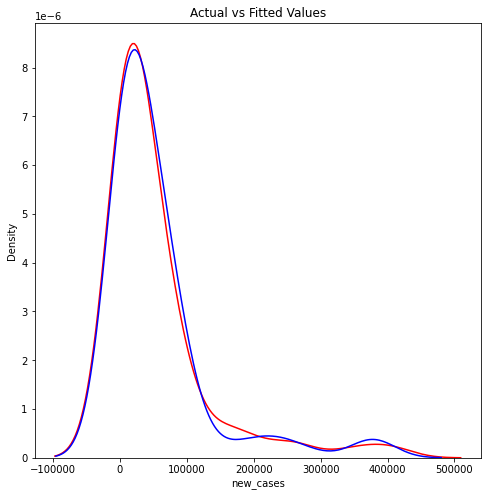

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse


24158.141365102838

In [ ]:
score=r2_score(y_test,y_pred)
score

0.9084702386203062

Use ID3-A to create trees in the forest.

ID3A K MEANS FOREST

In [ ]:
class Node_Id3:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
      
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node_Id3(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node_Id3(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict_arr(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

In [ ]:
class ID3Af:

  def __init__(self,min_leaf):
    self.min_leaf=min_leaf
  
  def fit(self, X, y):
    min_leaf = self.min_leaf
    self.dtree = Node_Id3(X, y, np.array(np.arange(len(y))), min_leaf)
    return self
  
  def predict_Id3(self, X):
    return self.dtree.predict_arr(X)

y_train= y_train.reset_index()
y_train =y_train['new_cases']


In [ ]:
from collections import Counter


def avg_val(y):
    return(np.mean(y))

class ID3Forest:
    
    def __init__(self, n_trees=3,min_leaf=5):
        self.n_trees = n_trees
        self.min_leaf=min_leaf
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = ID3Af(min_leaf=self.min_leaf)
            X_samp, y_samp = X, y
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict_Id3(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        
        y_pred = [avg_val(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [ ]:
clf2 = ID3Forest(n_trees = 5)
clf2.fit(X_train,y_train)

test=[]

for index, rows in X_test.iterrows():
    my_list =[rows.retail_and_recreation, rows.grocery_and_pharmacy, rows.residential, rows.transit_stations, rows.parks, rows.workplaces,rows.centroid,rows.error]
    test.append(my_list)

y_predictions = clf2.predict(test) 


In [ ]:
# y_pred

In [ ]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_predictions))

In [ ]:
rmse

33714.19424102068

In [ ]:
score=r2_score(y_test,y_predictions)
score

0.8217371429120209

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


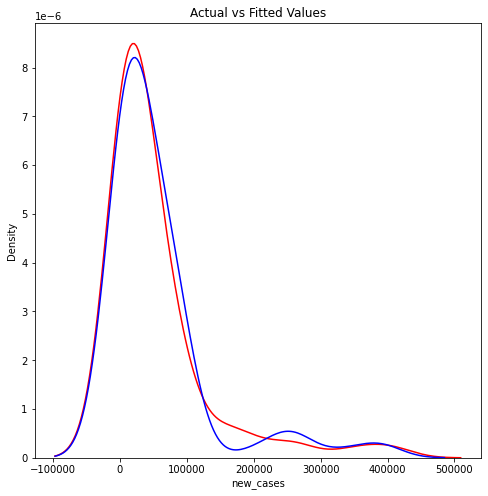

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

Compare the accuracy and performance of K-means Forests created
using CART and ID3-A for parts A. and B.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

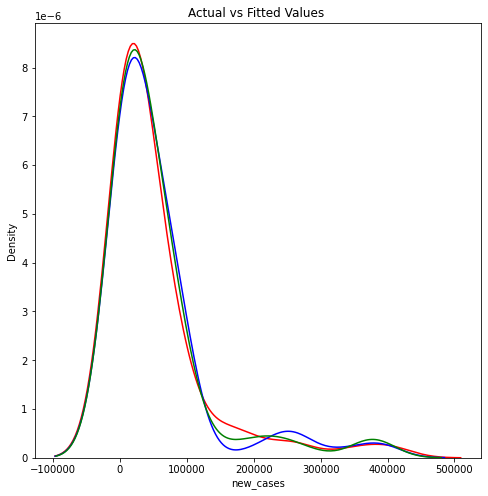

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predictions, hist=False, color="b", label="Fitted Values" , ax=ax)
sns.distplot(y_pred, hist=False, color="g", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values ')


plt.show()
plt.close()

RMSE AND R2 SCORE IS CALCULATED ABOVE FOR EACH ALGORITHM USED 
IN MY CASE ID3A IS GIVING BETTER RESULT THAN CART 